In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re

In [2]:
df = pd.read_csv('main_task.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


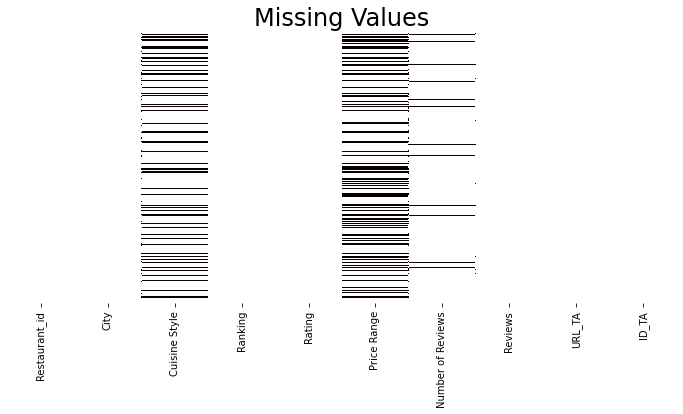

In [4]:
fig = plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(df.isnull(), cbar=False, cmap='hot_r', yticklabels=[]).set_title('Missing Values', fontsize=24)

In [5]:
# Убираем квадратные скобки
df['Cuisine Style'] = df['Cuisine Style'].str.replace(r'[\[\]]', '')

# Создаем списки из значений кухонь
def edit_cuisine(row):
    if pd.isnull(row):
        pass
    else:
        return row.split(',')

df['Cuisine Style'] = df['Cuisine Style'].apply(edit_cuisine)

In [6]:
# Содаем новый признак с количеством представленных кухонь
def cuisine_types(row):
    try:
        return len(row)
    except:
        return 1

df['number_of_cuisine_types'] = df['Cuisine Style'].apply(cuisine_types)

In [7]:
# Убираем квадратные скобки в Reviews
df['Reviews'] = df['Reviews'].str.replace(r'[\[\]]', '')

In [8]:
# Создать колонку с датой
pattern_date = re.compile('\d\d\/\d\d\/\d\d\d\d')

def catch_date(row):
    result = re.findall(pattern_date, row)
    return result

df['Review_date'] = df['Reviews'].apply(catch_date)

In [9]:
# Создать списки в Reviews
pattern = re.compile('\'(.*?)\'')

def split_reviews(row):
    result = re.findall(pattern, row)
    return result

df['Reviews'] = df['Reviews'].apply(split_reviews)

In [ ]:
# Извлечь данные из списков Reviews
# Требуется создать функцию

#pattern_date = re.compile('\d\d\/\d\d\/\d\d\d\d')
#for string in df['Reviews'].apply(split_reviews).loc[0]:
    #result = re.findall(pattern_date, string)
    #if not result:
        #print(string) # return вместо принт

In [52]:
# Конвертируем даты в правильный формат
def convert_time(row):
    for pos, date in enumerate(row):
        date = pd.Timestamp(date)
        return date

# Найдём дату последнего отзыва
def last_review(dates):
    date_temp = []
    try:
        for pos, date in enumerate(dates):
            date = pd.Timestamp(date)
            date_temp.append(date)
        return max(date_temp)
    except:
        return np.nan

# Найдём дату первого отзыва
def first_review(dates):
    date_temp = []
    try:
        for pos, date in enumerate(dates):
            date = pd.Timestamp(date)
            date_temp.append(date)
        return min(date_temp)
    except:
        return np.nan

In [53]:
df['Review_date'].apply(last_review)

0       2017-12-31
1       2017-07-06
2       2018-01-08
3              NaT
4       2017-11-18
           ...    
39995   2017-12-16
39996   2017-12-21
39997   2016-11-03
39998   2017-07-11
39999   2016-01-31
Name: Review_date, Length: 40000, dtype: datetime64[ns]

In [54]:
df['Review_date'].apply(first_review)

0       2017-11-20
1       2016-06-19
2       2018-01-06
3              NaT
4       2017-02-19
           ...    
39995   2017-11-12
39996   2017-12-12
39997   2008-04-12
39998   2017-06-18
39999   2012-07-04
Name: Review_date, Length: 40000, dtype: datetime64[ns]

In [55]:
df['Reviews'].loc[0]

['Good food at your doorstep',
 'A good hotel restaurant',
 '12/31/2017',
 '11/20/2017']